### Import the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Read the Datasets into Dataframes

In [4]:
book = pd.read_csv(r'C:\Users\Sofiyah\Desktop\Library Analysis\data\books.csv')
checkout = pd.read_csv(r'C:\Users\Sofiyah\Desktop\Library Analysis\data\checkouts.csv')
customer = pd.read_csv(r'C:\Users\Sofiyah\Desktop\Library Analysis\data\customers.csv')

### Cleaning Book Dataset 

In [5]:
book['publishedDate'] = pd.to_datetime(book['publishedDate'])
book['publishedYear'] = pd.to_datetime(book['publishedDate']).dt.year
book['publishedYear'].fillna(book['publishedYear'].mean(), inplace = True)
book['publishedYear'] = book['publishedYear'].astype(int)

In [6]:
book['price'] = pd.to_numeric(book['price'], errors = 'coerce')
book['price'].fillna(book['price'].mean(), inplace = True)

book['pages'] = pd.to_numeric(book['pages'], errors = 'coerce')
book['pages'].fillna(book['pages'].mean(), inplace = True)
book['pages'] = book['pages'].astype(int)


### Cleaning Checkout Dataset

In [7]:
# Replace all special characters with blank in the date checkout dataframe
checkout['date_checkout'] = checkout['date_checkout'].replace(to_replace='[%#$|]', regex=True, value='')[:]

# Change the date checkout dataframe to a datetime column
checkout['date_checkout'] = pd.to_datetime(checkout['date_checkout'])

# Create a new month and year column by extracting from the date_checkout column
checkout['year_checkout'] = pd.to_datetime(checkout['date_checkout']).dt.year

checkout['month_checkout'] = pd.to_datetime(checkout['date_checkout']).dt.strftime('%B')

In [8]:
# Replace all special characters in the date returned dataframe
checkout['date_returned'] = checkout['date_returned'].replace(to_replace='[%#$|]', regex=True, value='')[:]

# Change the date returned dataframe to a datetime column
checkout['date_returned'] = pd.to_datetime(checkout['date_returned'])

# Create a new month and year column by extracting from the date_returned column
checkout['year_returned'] = pd.to_datetime(checkout['date_returned']).dt.year

checkout['month_returned'] = pd.to_datetime(checkout['date_returned']).dt.strftime('%B')

In [9]:
# Cleaning unrealistic checkout and return years
checkout.loc[checkout['year_checkout'] > 2022, ['year_checkout']] = np.nan
checkout.loc[checkout['year_returned'] > 2022, ['year_returned']] = np.nan

# Replace the NaN values with mean values of checkout and returned years
checkout['year_checkout'].fillna(checkout['year_checkout'].mean(), inplace = True)
checkout['year_checkout'] = checkout['year_checkout'].astype(int)
checkout['month_checkout'].fillna(checkout['month_checkout'].mode()[0], inplace = True)

checkout['year_returned'].fillna(checkout['year_returned'].mean(), inplace = True)
checkout['year_returned'] = checkout['year_returned'].astype(int)
checkout['month_returned'].fillna(checkout['month_returned'].mode()[0], inplace = True)

In [10]:
# Create a dataframe to record the period at which a book remains with a patron
checkout['period'] = checkout['date_returned'] - checkout['date_checkout']
checkout['period'] = pd.to_numeric(checkout['period'].dt.days, downcast='integer')

checkout['period'].fillna(checkout['period'].mean(), inplace = True)

checkout['period'] = checkout['period'].astype(int)
checkout.drop(checkout[checkout['period'] < 0].index, inplace = True)

### Cleaning Customer Dataset

In [11]:
# Change the birth_year dataframe to a datetime column
customer['birth_date'] = pd.to_datetime(customer['birth_date'])
customer['birth_year'] = pd.to_datetime(customer['birth_date']).dt.year

# Replace the NaN values with mean values of the birth_year
customer.loc[customer['birth_year'] > 2015, ['birth_year']] = np.nan
customer['birth_year'].fillna(customer['birth_year'].mean(), inplace = True)

In [12]:
# Drop columns not needed
customer.drop(['birth_date','zipcode'], axis = 1, inplace = True)

## Exploratory Data Analysis

In [13]:
def pattern(dataframe):
    '''
    create a modified dataframe that contains importan columns
    
    Parameters:
    dataframe: Dataframe to modify
    
    Variables:
    edu: Holds cleaned up groups of education series
    Returns:
    A new dataframe to perform operation on 
    '''
    df = dataframe.copy()
    edu = []
    for row in df['education']:
        high_school = re.search("Hi|HI|hi| Hi", str(row))
        college_grad = re.search("Co| Co|CO|co", str(row))
        grad_degree = re.search("Gr|GR| Gr|gr", str(row))
        remain = re.search("Ot|ot|OT| Ot", str(row))
        if high_school:
            edu.append('High School')
        elif college_grad:
            edu.append('College')
        elif grad_degree:
            edu.append('Graduate Degree')
        elif remain:
            edu.append('Other')
        else:
            edu.append(np.nan)
        
    df['edu'] = edu

    area = []
    for row in df['state']:
        washington = re.search("wa|WA|Wa| Wa", str(row))
        oregon = re.search("or|Or|OR| or| Or", str(row))
        if washington:
            area.append('Washington')
        elif oregon:
            area.append('Oregon')
        else:
            area.append(np.nan)
    df['area'] = area
    
    job = []
    for row in df['occupation']:
        blue_collar = re.search("bl| bl|  bl|BL| BL|  BL|Bl| Bl|  Bl", str(row))
        edu_health = re.search("ed| ed|  ed|ED| ED|  ED|Ed| Ed|  Ed", str(row))
        sales = re.search("sa| sa|  sa|SA| SA|  SA|Sa| Sa|  Sa", str(row))
        tech = re.search("te| te|  te|TE| TE|  TE|Te| Te|  Te", str(row))
        others = re.search("ot| ot|  ot|OT| OT|  OT|Ot| Ot|  Ot", str(row))
        business = re.search("bu| bu|  bu|BU| BU|  BU|Bu| Bu|  Bu", str(row))
        admin = re.search("ad| ad|  ad|AD| AD|  AD|Ad| Ad|  Ad", str(row))
        
        if blue_collar:
            job.append("Blue Collar")
        elif edu_health:
            job.append("Education & Health")
        elif sales:
            job.append("Sales")
        elif tech:
            job.append("Tech")
        elif others:
            job.append("Other")
        elif business:
            job.append("Business & Finance")
        elif admin:
            job.append("Admin & Support")
        else:
            job.append(np.nan)
    
    df['job'] = job
    
    sex = []
    for row in df['gender']:
        
        male = re.search("ma| ma|MA", str(row))
        female = re.search("fe| fe|FE", str(row))
        
        if female:
            sex.append('Female')
        elif male:
            sex.append('Male')
        else:
            sex.append(np.nan)
            
    df['sex'] = sex
    
    age = []
    for row in df['birth_year']:
        if row <= 1982:
            age.append('Old')
        else:
            age.append('Young')
    
    df['age'] = age
    
    return df

In [14]:
# Reformed customer dataframe
new_customer = pattern(customer)

In [15]:
def meta(dataframe):
    '''
    Creates an elaborate dataframe on which operations are performed
    
    '''
    df = dataframe.copy()
    
    cost = []
    for row in df['price']:
        if row <= df['price'].mean():
            cost.append('Cheap')
        else:
            cost.append('Expensive')
    
    df['cost'] = cost
    
    leaves = []
    for row in df['pages']:
        if row <= 300:
            leaves.append(0)
        else:
            leaves.append(1)
    
    df['leaves'] = leaves
    
    pub = []
    for row in df['publishedYear']:
        if row <= 1975:
            pub.append("Old Book")
        else:
            pub.append("New Book")
    
    df["pub"] = pub
    
    return df
            

In [16]:
# Reformed book dataframe
new_book = meta(book)

In [17]:
# merge new_customer and checkout tables
customer_checkout = pd.merge(checkout, new_customer, left_on = 'patron_id', right_on = 'id')

# merge book and checkout tables
book_checkout = pd.merge(new_book, checkout, left_on = 'id', right_on = 'id')
# book_checkout.info()

In [18]:
# Find customers that haven't checked a book out of the library
df = checkout['patron_id'].values
patron_list = df.tolist()

check = '|'.join(patron_list)

regular = new_customer['id'].str.contains(check)

customer_checkout['regular'] = pd.Series(regular)

In [19]:
# merge customer_checkout with book
customer_book_checkout = pd.merge(customer_checkout, new_book, left_on = 'id_x', right_on = 'id')

<AxesSubplot:xlabel='month_checkout'>

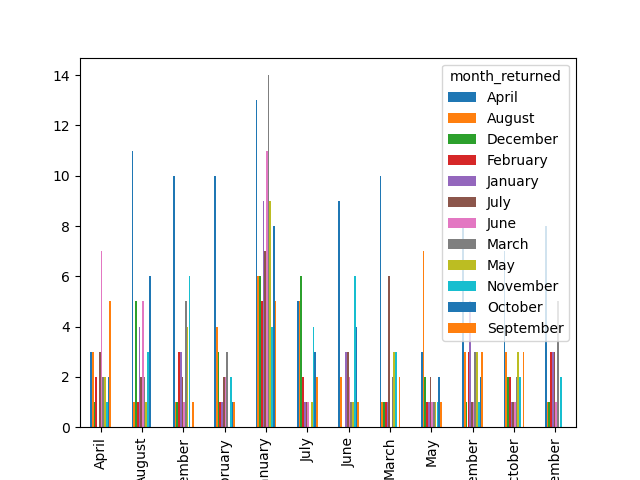

In [19]:
# Months where books with late returns are borrowed most / 
%matplotlib widget
fig, ax = plt.subplots()
checkout[['month_checkout', 'month_returned', 'period', 'id']].where(checkout['period'] > 28).groupby(['month_checkout', 'month_returned'])['id'].count().sort_values(ascending = False)
checkout.where(checkout['period'] > 28).groupby(['month_checkout', 'month_returned'])['period'].count().sort_values(ascending = False).unstack().plot(kind = 'bar',ax = ax)

<AxesSubplot:xlabel='month_checkout'>

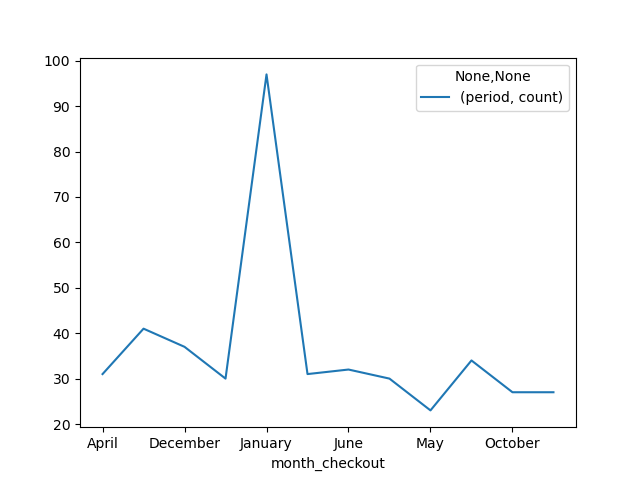

In [70]:
# Month where late returned books were borrowed
%matplotlib inline
%matplotlib widget

checkout.where(checkout['period'] > 28).groupby('month_checkout').agg({'period':['count']}).sort_values(by = 'month_checkout')
fig, ax = plt.subplots(1)
checkout.where(checkout['period'] > 28).groupby('month_checkout').agg({'period':['count']}).sort_values(by = 'month_checkout').plot.line(ax = ax)

<AxesSubplot:xlabel='month_returned'>

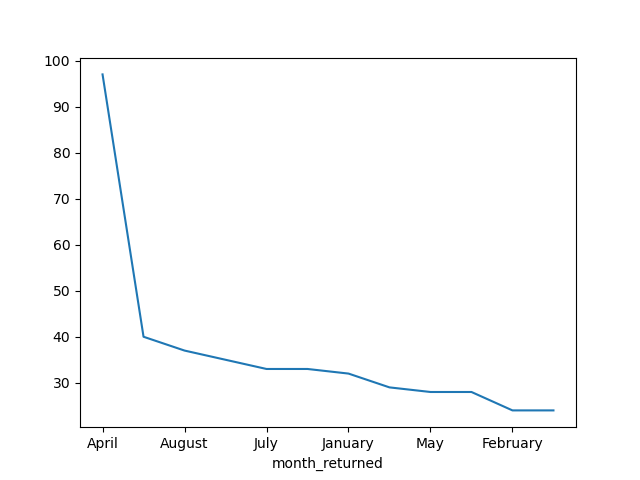

In [20]:
# number of late returns per month
%matplotlib inline
%matplotlib widget
checkout.where(checkout['period'] > 28).groupby('month_returned')['period'].count().sort_values(ascending = False)
fig, ax = plt.subplots(1)
checkout.where(checkout['period'] > 28).groupby('month_returned')['period'].count().sort_values(ascending = False).plot(kind = 'line', ax = ax)

<AxesSubplot:ylabel='id,title'>

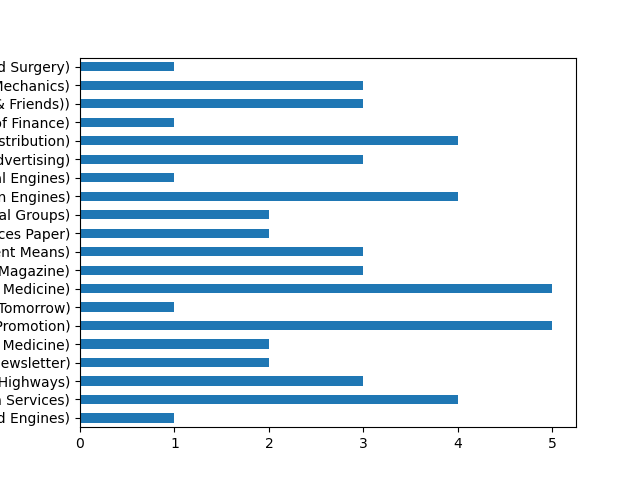

In [27]:
# Book with most late returns/ Number of times a book has been returned late
%matplotlib inline
%matplotlib widget
book_checkout.where(book_checkout['period'] > 28).groupby(['id', 'title'])['id'].count()[:20].plot(kind = 'barh')

In [22]:
# Detailed Number of times a book has been returned late 
customer_book_checkout.where(customer_book_checkout['period'] > 28).groupby(['id_x', 'period', 'name'])['id_x'].count()

id_x          period   name            
-xFj0vTLbRIC  579.0    Maria Perino        1
0mt9NdDSmYYC  29.0     Lula Barber         1
              93.0     David Lee           1
              118.0    barbie SMITH        1
              579.0    Estrella Harris     1
                                          ..
ygoFAAAAQAAJ  75.0     Luke Smyth          1
              579.0    Kimberly Riggert    1
              33829.0  Jerry Mohammed      1
z9-lHMQjvD0C  579.0    Jerry Salazar       1
              34552.0  Jessica Kearney     1
Name: id_x, Length: 440, dtype: int64

<AxesSubplot:ylabel='id,title'>

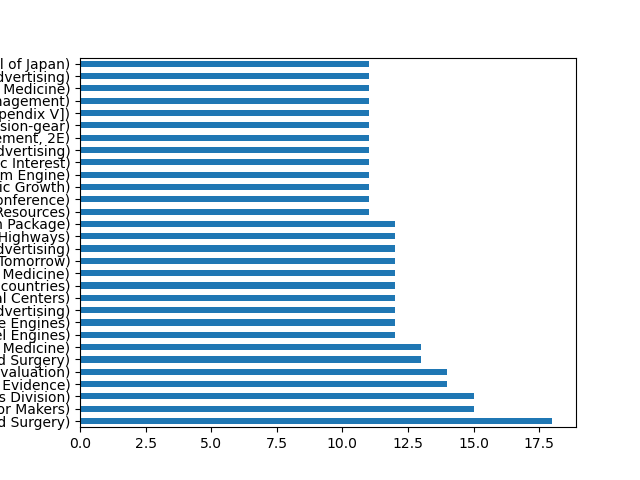

In [30]:
# most borrowed book in library
%matplotlib inline
%matplotlib widget
book_checkout[['id', 'title','publisher']].groupby(['id', 'title'])['id'].count().sort_values(ascending = False)[:30].plot(kind='barh')

###### Most borrowed book in the library is also the book with the most late returns

<AxesSubplot:xlabel='month_checkout'>

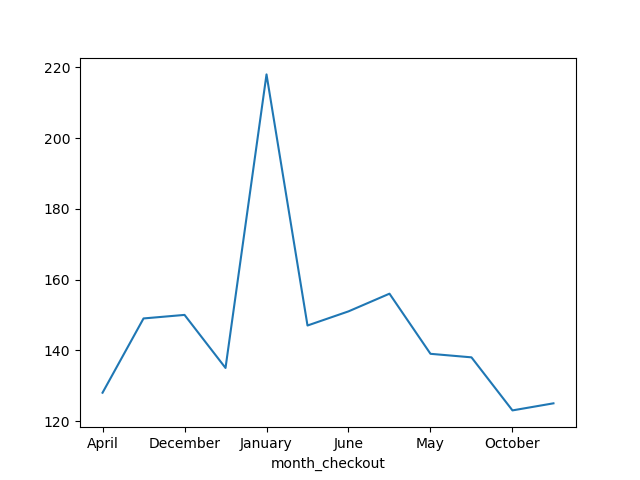

In [24]:
# Number of books borrowed per month
%matplotlib inline
%matplotlib widget
book_checkout.groupby('month_checkout')['id'].count().plot(kind = 'line')

<AxesSubplot:xlabel='month_returned'>

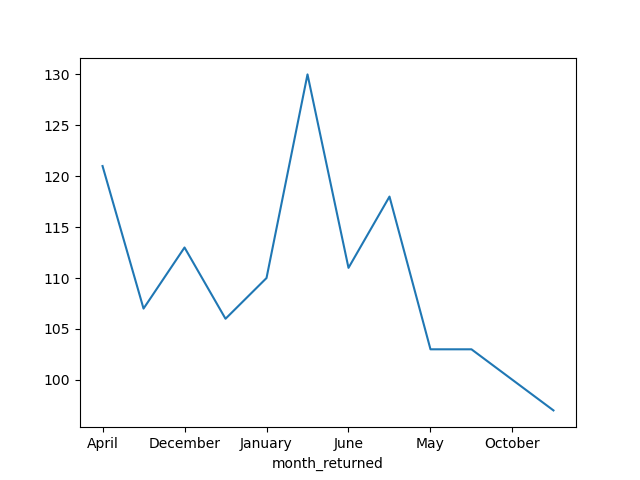

In [33]:
# Early returns per month
%matplotlib inline
%matplotlib widget
checkout.where(checkout['period'] <= 28).groupby('month_returned')['period'].count().plot()

In [26]:
# How often do coustomers checkout books in the library
customer_checkout.groupby(['id_y', 'id_x'])['id_x'].count().sort_values(ascending = False)

id_y                              id_x        
003b96590703c732382d2216906d6fa3  2uuX1zhTFakC    1
a5f9bfdf9462839b6a5b44994e7bb5b5  DhbHyWW4BZcC    1
a7725b3934b19c1b428f3c4652bc4cc0  rNbuDwAAQBAJ    1
a719f7da4ad17212fbeecb331a334ee4  1hZrAAAAMAAJ    1
a708f7738a07f28e45b7501457b710bf  H31XAAAAMAAJ    1
                                                 ..
5309a8d75537382d6e2ee58b78fa8138  CW-7tHAaVR0C    1
52b6d2a6d7c652bf18bb514da41471cd  tjYSQXeKUA4C    1
529979f69bcda5cec760005da7978c11  -xFj0vTLbRIC    1
5294660dc224988a8182e04227a2ab28  _fjaJ6XXAAQC    1
fff949d70363739aa8aabb5bcfc52e97  SovM2UsP7nAC    1
Name: id_x, Length: 1759, dtype: int64

###### From the result above, we notice that the customers that have borrowed books have only checked out once in the library and since each customer has only checked out once, there isn't a patron with a higher frequency of late returns.

<AxesSubplot:xlabel='month_checkout,title'>

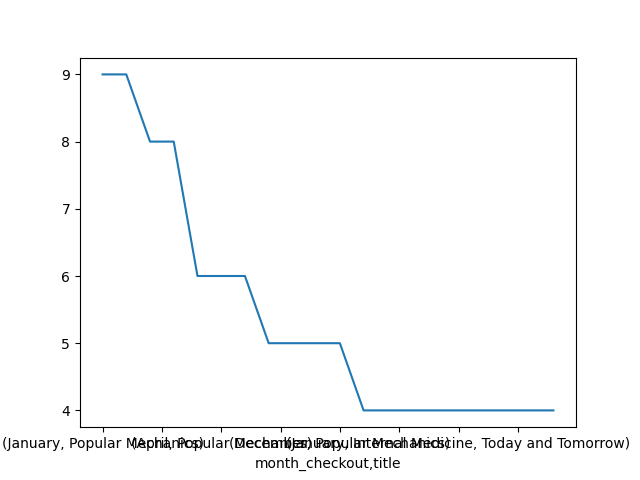

In [27]:
# most borrowed book per month
%matplotlib inline
%matplotlib widget
book_checkout[['month_checkout', 'title']].groupby(['month_checkout', 'title'])['title'].count().sort_values(ascending = False)[:20].plot(kind = 'line')

In [35]:
# Number of customers with late returns
customer_checkout.where(customer_checkout['period'] > 28).groupby(['id_y', 'id_x'])['id_x'].count()

id_y                              id_x        
006ec5b8f21fba3c5da132ee0f385a69  nndUAAAAMAAJ    1
009a2d5c7b3e82803a50ee2804a7f8db  _L9IAAAAYAAJ    1
00a03fa2d7f78b3a01a62beeb666cc34  frzDCQAAQBAJ    1
0276e7e25f1f2b4d179c3be74c074941  9pZWAAAAcAAJ    1
043f788a782b8933b5f208efefefb247  egEeAQAAIAAJ    1
                                                 ..
fcf060ce8c069715bb69e787af8395fb  hCVACwAAQBAJ    1
fdad135846a966f69f100f345610015c  PSmsBwAAQBAJ    1
fe34411e8437cc2a738994b4bdaa57df  nndUAAAAMAAJ    1
fe65649b5c9ead5c82359d296355bc07  79QDAAAAMBAJ    1
fff949d70363739aa8aabb5bcfc52e97  SovM2UsP7nAC    1
Name: id_x, Length: 440, dtype: int64

###### From the result above we conclude that 440 customers return books late

<AxesSubplot:ylabel='categories'>

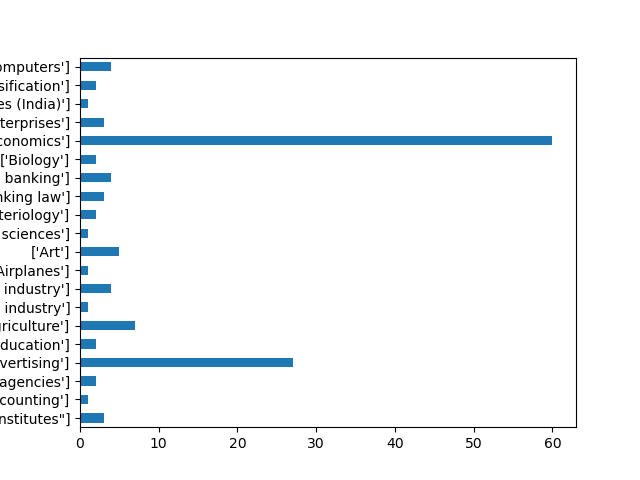

In [29]:
# number of books with late returns per category / categories of books that were mosty returned late 
%matplotlib inline
%matplotlib widget
book_checkout.where(book_checkout['period'] > 28).groupby('categories')['id'].count()[:20].plot(kind = 'barh')

<AxesSubplot:ylabel='categories'>

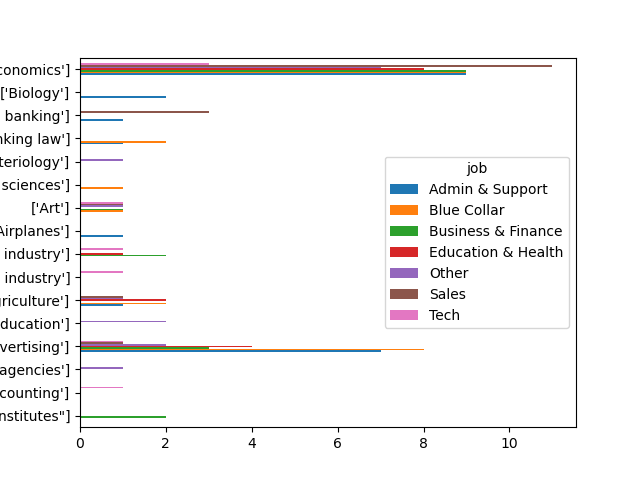

In [46]:
# Occupation of patrons that have late returns in each book category
%matplotlib inline
%matplotlib widget
customer_book_checkout.where(customer_book_checkout['period'] > 28).groupby(['categories', 'job'])['patron_id'].count()[:40].unstack().plot(kind = 'barh')

<AxesSubplot:xlabel='id,pages'>

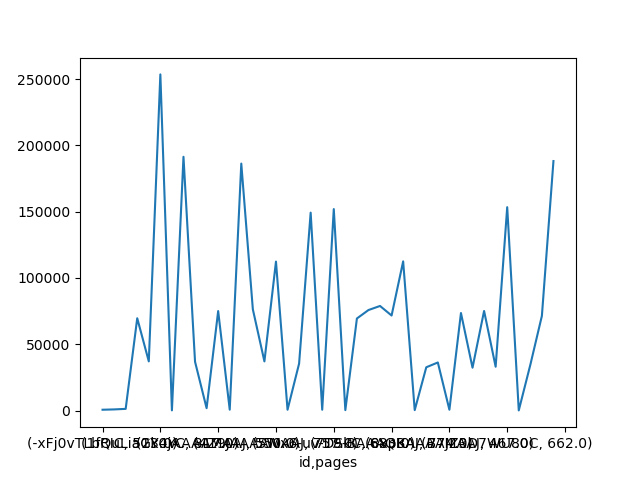

In [31]:
# Total period books over 300 pages took before being returned 
%matplotlib inline
%matplotlib widget
book_checkout.where((book_checkout['pages'] > 300) & (book_checkout['period'] > 28)).groupby(['id', 'pages'])['period'].sum('period')[:40].plot()

In [47]:
book_checkout.where(book_checkout['period'] > 28).groupby('leaves')['id'].count()

leaves
0.0      7
1.0    433
Name: id, dtype: int64

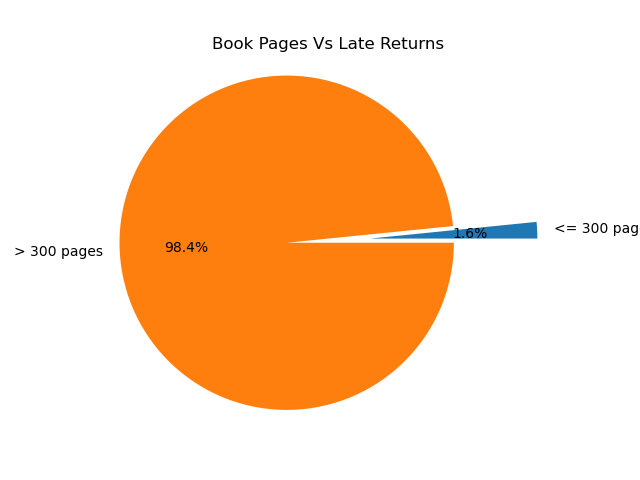

In [48]:
# plot late returns with book pages
%matplotlib inline
%matplotlib widget

# Number of late books that has more than 300 pages (433) and less than 300 pages(7) 
df = book_checkout.where(book_checkout['period'] > 28).groupby('leaves')['id'].count()

my_labels = '<= 300 pages','> 300 pages'
my_explode = (0.5, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Book Pages Vs Late Returns')
plt.axis('equal')
plt.show()

###### The chart shows that the books page affects how quickly the books are returned

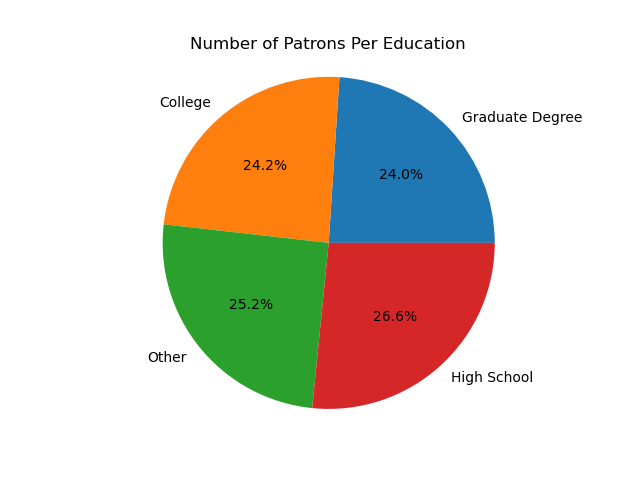

In [33]:
# Education with occupation of patron
%matplotlib inline
%matplotlib widget

df = new_customer.groupby('edu')['job'].count().sort_values()

my_labels = 'Graduate Degree', 'College', 'Other', 'High School'
my_explode = (0, 0, 0, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Number of Patrons Per Education')
plt.axis('equal')
plt.show()

In [34]:
# Total Late returns in the library
book_checkout['id'].where(book_checkout['period'] > 28).count()

440

<AxesSubplot:xlabel='job'>

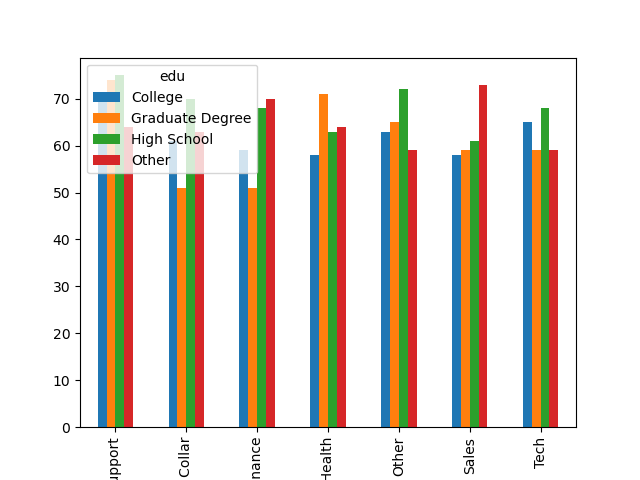

In [35]:
# Plot the number of parons in each occupation
%matplotlib inline
%matplotlib widget

new_customer.groupby(['job', 'edu'])['id'].count().unstack().plot(kind = 'bar')

In [38]:
# Number of customers that haven't checked out
result = new_customer['id'].nunique() - customer_checkout['patron_id'].nunique()
result

241

In [39]:
# Find details of customers that haven't checked a book out of the library
customer_checkout[['id_y', 'name', 'edu','job', 'area']].where(customer_checkout['regular'] == False).groupby(['id_y', 'name', 'edu','job', 'area']).count()    

,,,,
id_y,name,edu,job,area
0458c3951717674478e460e710795999,Ed McConnell,High School,Tech,Oregon
0595dbff9db8b4dda5f1085fa7699dce,Thomas Honkala,High School,Other,Oregon
0729bcb3e44df003f421f3945dc3246e,Jason Brown,Other,Blue Collar,Oregon
0790eadd4edf6d42daab0525e0bc2979,Christina Austin,College,Business & Finance,Oregon
082b69f326c282248a5c67572824cf19,Kyle Willson,High School,Tech,Oregon
...,...,...,...,...
fac6d35e6526dbb1d31fdb68aec35449,Daniel KENNEDY,Graduate Degree,Education & Health,Washington
fad855d6eef621f96909d3a7aad9b36e,Kenneth Mitchell,Other,Business & Finance,Oregon
fbaa8ec485b35e787bc8bd374628f233,Margaret Morgan,College,Education & Health,Oregon


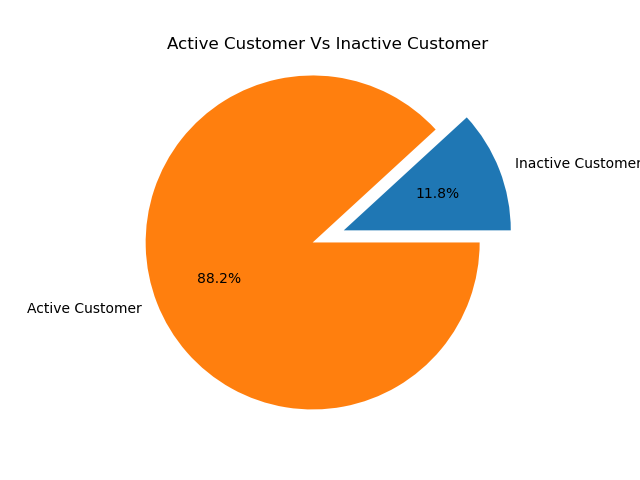

In [40]:
# Active customers vs inactive customers
%matplotlib inline
%matplotlib widget

df = customer_checkout.groupby('regular')['name'].count()

my_labels = 'Inactive Customer', 'Active Customer'
my_explode = (0, 0.2)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Active Customer Vs Inactive Customer')
plt.axis('equal')
plt.show()

<AxesSubplot:ylabel='area'>

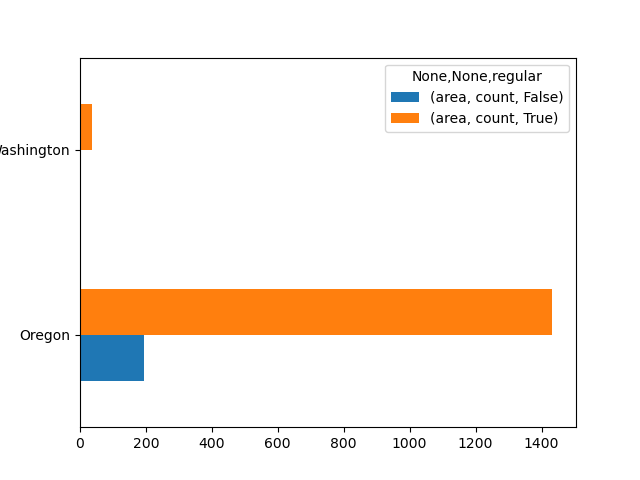

In [41]:
# plot both active and inactive customers from both states
%matplotlib inline
%matplotlib widget
customer_checkout[['id_y', 'name', 'edu','regular', 'area']].groupby(['area', 'regular']).agg({'area':['count']}).unstack().plot(kind = 'barh')

In [42]:
# How many customers from each states are active
customer_checkout[['id_y', 'name', 'edu','job', 'area']].where(customer_checkout['regular'] == True).groupby('area').agg({'area':['count']})   

,area
,count
area,
Oregon,1433
Washington,36


###### There are 1433 active patrons from Oregon out of 1628 registered patrons the and 36 active patrons from Washington out of 40 registered patrons

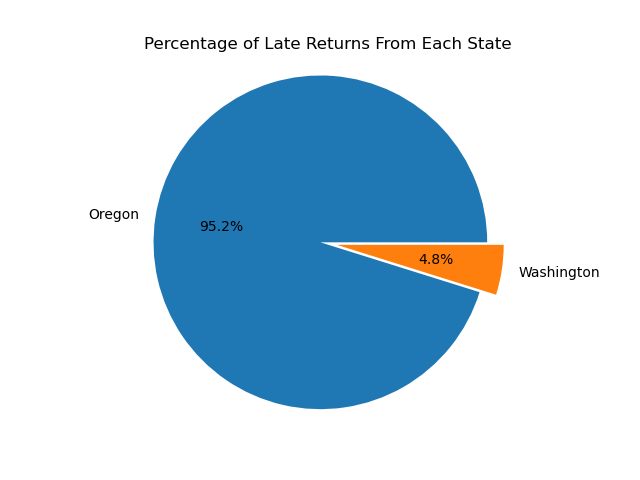

In [43]:
# How does the state the patron lives affects late returns
%matplotlib inline
%matplotlib widget

df = customer_book_checkout.where((customer_book_checkout['period'] > 28)).groupby('area')['area'].count()  
my_labels = 'Oregon', 'Washington'
my_explode = (0, 0.1)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title("Percentage of Late Returns From Each State")
plt.axis('equal')
plt.show()

###### Comapring the number of active patrons from washington(36) and patrons from washington that have late returns(20), we can conclude that not all(40) patrons from washington have late returns

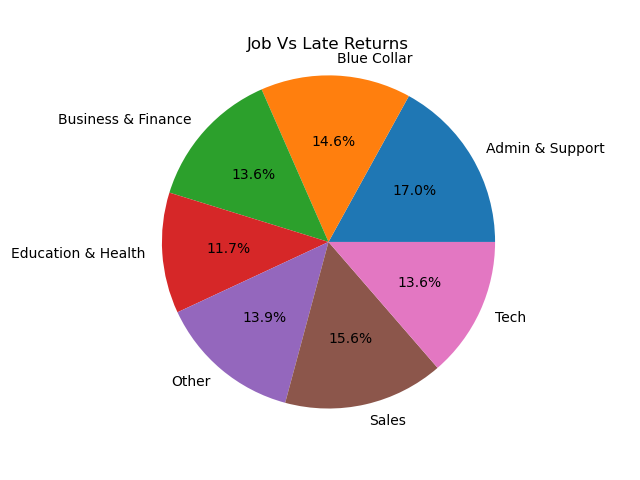

In [46]:
# How does the job of the patron affect late returns
%matplotlib inline
%matplotlib widget

df = customer_book_checkout.where(customer_book_checkout['period'] > 28).groupby('job')['job'].count()

my_labels = 'Admin & Support', 'Blue Collar', 'Business & Finance', 'Education & Health', 'Other', 'Sales', 'Tech'
my_explode = (0, 0, 0, 0, 0, 0, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title("Job Vs Late Returns")
plt.axis('equal')
plt.show()

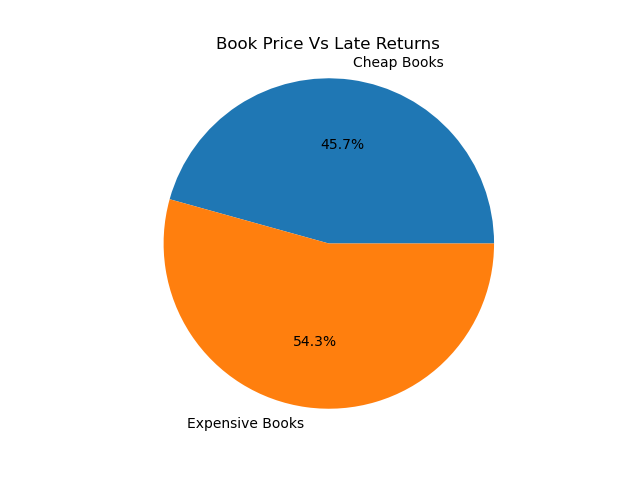

In [48]:
# What has the book price got to do with late book returns
%matplotlib inline
%matplotlib widget

df = book_checkout.where(book_checkout['period'] > 28).groupby('cost')['id'].count()

my_labels = 'Cheap Books', 'Expensive Books'
my_explode = (0, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Book Price Vs Late Returns')
plt.axis('equal')
plt.show()

###### More than half (239) of the total (440) late returns of books have prices higher than the mean price off books. Books with higher prices have more late returns than books with lower prices.

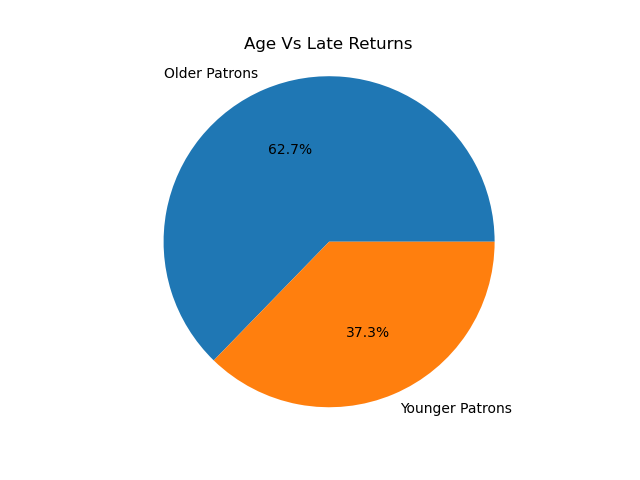

In [49]:
# What has the patron age got to do with late book returns
%matplotlib inline
%matplotlib widget

df = customer_book_checkout.where(customer_book_checkout['period'] > 28).groupby('age')['id'].count()

my_labels = 'Older Patrons', 'Younger Patrons'
my_explode = (0, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Age Vs Late Returns')
plt.axis('equal')
plt.show()

###### More than half (276) of the total (440) late returns of books are returned by older patrons(40 years and above). Books borrowed by older patrons have more late returns than books borrowed by younger patrons

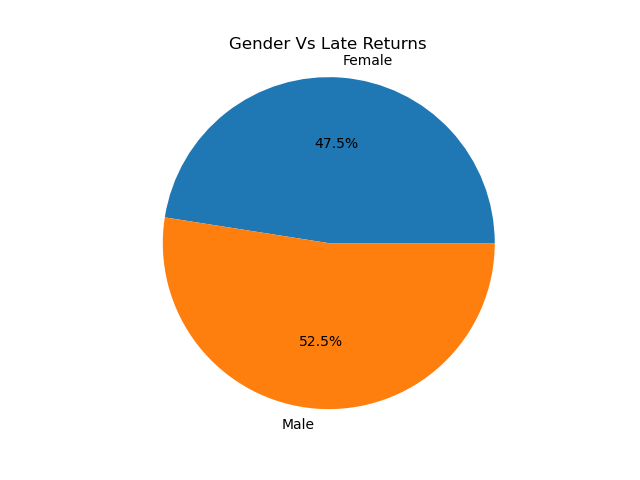

In [50]:
# plot rate of late returns of both male and female patrons
%matplotlib inline
%matplotlib widget

df = customer_book_checkout.where(customer_book_checkout['period'] > 28).groupby('sex')['id'].count()

my_labels = 'Female', 'Male'
my_explode = (0, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Gender Vs Late Returns')
plt.axis('equal')
plt.show()

###### More than half  of the total (440) late returns of books are returned by male patrons. Books borrowed by male patrons have more late returns than books borrowed by female patrons

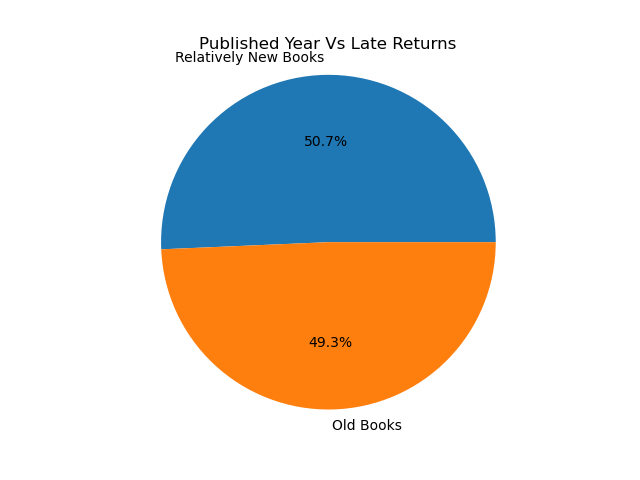

In [53]:
# How does the published date factor in late raturns of books
%matplotlib inline
%matplotlib widget

df = book_checkout.where(book_checkout['period'] > 28).groupby('pub')['id'].count()

my_labels = 'Relatively New Books', 'Old Books'
my_explode = (0, 0)
plt.pie(df, labels=my_labels, autopct='%1.1f%%', explode=my_explode)
plt.title('Published Year Vs Late Returns')
plt.axis('equal')
plt.show()

In [20]:
customer_book_checkout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_x            1759 non-null   object        
 1   patron_id       1759 non-null   object        
 2   library_id      1759 non-null   object        
 3   date_checkout   1694 non-null   datetime64[ns]
 4   date_returned   1701 non-null   datetime64[ns]
 5   year_checkout   1759 non-null   int32         
 6   month_checkout  1759 non-null   object        
 7   year_returned   1759 non-null   int32         
 8   month_returned  1759 non-null   object        
 9   period          1759 non-null   int32         
 10  id_y            1759 non-null   object        
 11  name            1759 non-null   object        
 12  street_address  1759 non-null   object        
 13  city            1675 non-null   object        
 14  state           1668 non-null   object        
 15  gend

### Import Machine Learning Libraries

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=120e88d1adca067efec314f148d3bc6206a6d5807646d060ea5cb2533a0cffbd
  Stored in directory: c:\users\sofiyah\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
customer_book_checkout.drop(columns =['C', 'D'])